In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import requests

In [ ]:
new=pd.read_excel('/content/DataForTable2.1WHR2023.xls')

In [ ]:
region_df=pd.read_csv('/content/region_df.csv')

In [ ]:
region_df.count

<bound method DataFrame.count of       Unnamed: 0           country                        region
0              0       Switzerland                Western Europe
1              1           Iceland                Western Europe
2              2           Denmark                Western Europe
3              3            Norway                Western Europe
4              4            Canada         North America and ANZ
...          ...               ...                           ...
1362        1362  Congo (Kinshasa)            Sub-Saharan Africa
1363        1363          Zimbabwe            Sub-Saharan Africa
1364        1364      Sierra Leone            Sub-Saharan Africa
1365        1365           Lebanon  Middle East and North Africa
1366        1366       Afghanistan                    South Asia

[1367 rows x 3 columns]>

In [ ]:
#checking duplicates
duplicates_region=region_df.duplicated(subset=['country'])
duplicate_rows_region = region_df[duplicates_region]
print(duplicate_rows_region)

      Unnamed: 0           country                        region
158          158           Denmark                Western Europe
159          159       Switzerland                Western Europe
160          160           Iceland                Western Europe
161          161            Norway                Western Europe
162          162           Finland                Western Europe
...          ...               ...                           ...
1362        1362  Congo (Kinshasa)            Sub-Saharan Africa
1363        1363          Zimbabwe            Sub-Saharan Africa
1364        1364      Sierra Leone            Sub-Saharan Africa
1365        1365           Lebanon  Middle East and North Africa
1366        1366       Afghanistan                    South Asia

[1196 rows x 3 columns]


In [ ]:
region_df.columns

Index(['Unnamed: 0', 'country', 'region'], dtype='object')

In [ ]:
region_df=region_df.drop('Unnamed: 0', axis =1)
print(region_df)

               country                        region
0          Switzerland                Western Europe
1              Iceland                Western Europe
2              Denmark                Western Europe
3               Norway                Western Europe
4               Canada         North America and ANZ
...                ...                           ...
1362  Congo (Kinshasa)            Sub-Saharan Africa
1363          Zimbabwe            Sub-Saharan Africa
1364      Sierra Leone            Sub-Saharan Africa
1365           Lebanon  Middle East and North Africa
1366       Afghanistan                    South Asia

[1367 rows x 2 columns]


In [ ]:
unique_country_region=region_df['country'].nunique()
print(unique_country_region)

171


In [ ]:
# remove duplicates
region_df_no_duplicate = region_df.drop_duplicates()

In [ ]:
region_df_no_duplicate.shape

(171, 2)

In [ ]:
region_df_no_duplicate.head()

,country,region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America and ANZ


In [ ]:
new.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [ ]:
df=new.round(2)

In [ ]:
df.count()

Country name                        2199
year                                2199
Life Ladder                         2199
Log GDP per capita                  2179
Social support                      2186
Healthy life expectancy at birth    2145
Freedom to make life choices        2166
Generosity                          2126
Perceptions of corruption           2083
Positive affect                     2175
Negative affect                     2183
dtype: int64

In [ ]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [ ]:
new_df=df.dropna()

In [ ]:
new_df.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [ ]:
new_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [ ]:
from os import rename
rename_dict = {
  'Country name' : 'country',
  'Life Ladder' : 'Life_Ladder',
  'Log GDP per capita' : 'Log_GDP_per_capita',
  'Social support' : 'Social_support',
  'Healthy life expectancy at birth': 'Healthy_life_expectancy_at_birth',
  'Freedom to make life choices' : 'Freedom_to_make_life_choices' ,
  'Perceptions of corruption' : 'Perceptions_of_corruption'
       }
new_df=new_df.rename(columns=rename_dict)

In [ ]:
new_df

,country,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.72,7.35,0.45,50.50,0.72,0.17,0.88,0.41,0.26
1,Afghanistan,2009,4.40,7.51,0.55,50.80,0.68,0.19,0.85,0.48,0.24
2,Afghanistan,2010,4.76,7.61,0.54,51.10,0.60,0.12,0.71,0.52,0.28
3,Afghanistan,2011,3.83,7.58,0.52,51.40,0.50,0.16,0.73,0.48,0.27
4,Afghanistan,2012,3.78,7.66,0.52,51.70,0.53,0.24,0.78,0.61,0.27
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.62,7.78,0.78,52.62,0.76,-0.05,0.84,0.66,0.21
2195,Zimbabwe,2019,2.69,7.70,0.76,53.10,0.63,-0.05,0.83,0.66,0.24
2196,Zimbabwe,2020,3.16,7.60,0.72,53.58,0.64,0.01,0.79,0.66,0.35
2197,Zimbabwe,2021,3.15,7.66,0.69,54.05,0.67,-0.08,0.76,0.61,0.24


In [ ]:
new_df_region=new_df.merge(region_df_no_duplicate, on='country', how='left' )

In [ ]:
new_df_region=new_df_region.drop(new_df_region[new_df_region['year'] == 2005].index)


In [ ]:
selected_years = [2005]
selected_rows = new_df_region[new_df_region['year'].isin(selected_years)]
print(selected_rows)

Empty DataFrame
Columns: [country, year, Life_Ladder, Log_GDP_per_capita, Social_support, Healthy_life_expectancy_at_birth, Freedom_to_make_life_choices, Generosity, Perceptions_of_corruption, Positive affect, Negative affect, region]
Index: []


In [ ]:
unique_year=new_df_region['year'].nunique()
print(unique_year)

17


In [ ]:
new_df.drop('Positive affect', axis=1, inplace=True)
print(new_df)

          country  year  Life_Ladder  Log_GDP_per_capita  Social_support  \
0     Afghanistan  2008         3.72                7.35            0.45   
1     Afghanistan  2009         4.40                7.51            0.55   
2     Afghanistan  2010         4.76                7.61            0.54   
3     Afghanistan  2011         3.83                7.58            0.52   
4     Afghanistan  2012         3.78                7.66            0.52   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018         3.62                7.78            0.78   
2195     Zimbabwe  2019         2.69                7.70            0.76   
2196     Zimbabwe  2020         3.16                7.60            0.72   
2197     Zimbabwe  2021         3.15                7.66            0.69   
2198     Zimbabwe  2022         3.30                7.67            0.67   

      Healthy_life_expectancy_at_birth  Freedom_to_make_life_choices  \
0              

In [ ]:
new_df.drop('Negative affect', axis=1, inplace=True)
print(new_df)

          country  year  Life_Ladder  Log_GDP_per_capita  Social_support  \
0     Afghanistan  2008         3.72                7.35            0.45   
1     Afghanistan  2009         4.40                7.51            0.55   
2     Afghanistan  2010         4.76                7.61            0.54   
3     Afghanistan  2011         3.83                7.58            0.52   
4     Afghanistan  2012         3.78                7.66            0.52   
...           ...   ...          ...                 ...             ...   
2194     Zimbabwe  2018         3.62                7.78            0.78   
2195     Zimbabwe  2019         2.69                7.70            0.76   
2196     Zimbabwe  2020         3.16                7.60            0.72   
2197     Zimbabwe  2021         3.15                7.66            0.69   
2198     Zimbabwe  2022         3.30                7.67            0.67   

      Healthy_life_expectancy_at_birth  Freedom_to_make_life_choices  \
0              

In [ ]:
new_df.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2194       Zimbabwe
2195       Zimbabwe
2196       Zimbabwe
2197       Zimbabwe
2198       Zimbabwe
Name: country, Length: 1958, dtype: object

In [ ]:
new_df['country'].duplicated(keep=False)

0       True
1       True
2       True
3       True
4       True
        ... 
2194    True
2195    True
2196    True
2197    True
2198    True
Name: country, Length: 1958, dtype: bool

In [ ]:
duplicates=new_df.duplicated(subset=['country', 'year'])
duplicate_rows = new_df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [country, year, Life_Ladder, Log_GDP_per_capita, Social_support, Healthy_life_expectancy_at_birth, Freedom_to_make_life_choices, Generosity, Perceptions_of_corruption]
Index: []


In [ ]:
new_df.head(2)

,country,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,Afghanistan,2008,3.72,7.35,0.45,50.5,0.72,0.17,0.88
1,Afghanistan,2009,4.40,7.51,0.55,50.8,0.68,0.19,0.85


In [ ]:
# @title Default title text
new_df.shape

(1958, 9)

In [ ]:
new_df_region.shape

(1957, 12)

In [ ]:
new_df_region=new_df_region.dropna()

In [ ]:
new_df_region.shape

(1956, 12)

In [ ]:
new_df_region.to_csv('new_df_region_2.csv')

In [ ]:
new_df_region.head(2)

,country,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.72,7.35,0.45,50.5,0.72,0.17,0.88,0.41,0.26,South Asia
1,Afghanistan,2009,4.40,7.51,0.55,50.8,0.68,0.19,0.85,0.48,0.24,South Asia


In [ ]:
unique_region=new_df_region['region'].nunique()
print(unique_region)

10


In [ ]:
unique_country=new_df_region['country'].nunique()
print(unique_country)

155


In [ ]:
new_df_region.groupby('region')['Life_Ladder'].mean()

region
Central and Eastern Europe            5.423064
Commonwealth of Independent States    5.477414
East Asia                             5.702449
Latin America and Caribbean           6.002484
Middle East and North Africa          5.114768
North America and ANZ                 7.215246
South Asia                            4.509681
Southeast Asia                        5.388512
Sub-Saharan Africa                    4.317957
Western Europe                        6.868099
Name: Life_Ladder, dtype: float64

In [ ]:
group_df=new_df_region.groupby('year' and 'region')['Life_Ladder'].mean().reset_index()

In [ ]:
group_df.head(20)

,region,Life_Ladder
0,Central and Eastern Europe,5.423064
1,Commonwealth of Independent States,5.477414
2,East Asia,5.702449
3,Latin America and Caribbean,6.002484
4,Middle East and North Africa,5.114768
5,North America and ANZ,7.215246
6,South Asia,4.509681
7,Southeast Asia,5.388512
8,Sub-Saharan Africa,4.317957
9,Western Europe,6.868099


<function matplotlib.pyplot.show(close=None, block=None)>

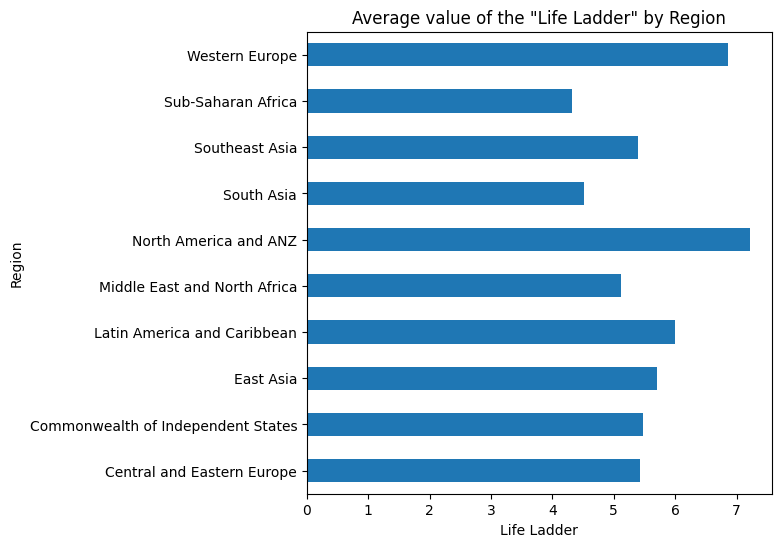

In [ ]:
plt.figure(figsize=(6,6))
region_mean=new_df_region.groupby('region')['Life_Ladder'].mean()
region_mean.plot(kind='barh', x='region', y='Life_Ladder')
plt.title('Average value of the "Life Ladder" by Region')
plt.xlabel('Life Ladder')
plt.ylabel('Region')
plt.show


In [ ]:
new_df_region.groupby('year')['Life_Ladder'].mean()

year
2006    5.199189
2007    5.376154
2008    5.444158
2009    5.455283
2010    5.509554
2011    5.374924
2012    5.411074
2013    5.346935
2014    5.369845
2015    5.374609
2016    5.383360
2017    5.486439
2018    5.509457
2019    5.540155
2020    5.738571
2021    5.613684
2022    5.601346
Name: Life_Ladder, dtype: float64

In [ ]:
#Average by country and year
avarage_country=new_df_region.groupby(['country', 'year'], as_index= False)['Life_Ladder'].mean()

In [ ]:
avarage_country

,country,year,Life_Ladder
0,Afghanistan,2008,3.72
1,Afghanistan,2009,4.40
2,Afghanistan,2010,4.76
3,Afghanistan,2011,3.83
4,Afghanistan,2012,3.78
...,...,...,...
1951,Zimbabwe,2018,3.62
1952,Zimbabwe,2019,2.69
1953,Zimbabwe,2020,3.16
1954,Zimbabwe,2021,3.15


In [ ]:
avarage_country.head()

,country,year,Life_Ladder
0,Afghanistan,2008,3.72
1,Afghanistan,2009,4.40
2,Afghanistan,2010,4.76
3,Afghanistan,2011,3.83
4,Afghanistan,2012,3.78


In [ ]:
#country ranking in each year
ranke= avarage_country.groupby('year')['Life_Ladder'].rank(ascending=False, method='max')

In [ ]:
top10_by_year = ranke[ranke <= 10]
print(top10_by_year)


72       5.0
74       6.0
75       6.0
77       9.0
78       9.0
        ... 
1846    10.0
1847     8.0
1890    10.0
1892     7.0
1893     5.0
Name: Life_Ladder, Length: 168, dtype: float64


In [ ]:
unique_year=new_df_region['year'].unique()

In [ ]:
new_df_region.groupby('year')['Life_Ladder'].mean()

year
2006    5.199189
2007    5.376154
2008    5.444158
2009    5.455283
2010    5.509554
2011    5.374924
2012    5.411074
2013    5.346935
2014    5.369845
2015    5.374609
2016    5.383360
2017    5.486439
2018    5.509457
2019    5.540155
2020    5.738571
2021    5.613684
2022    5.601346
Name: Life_Ladder, dtype: float64

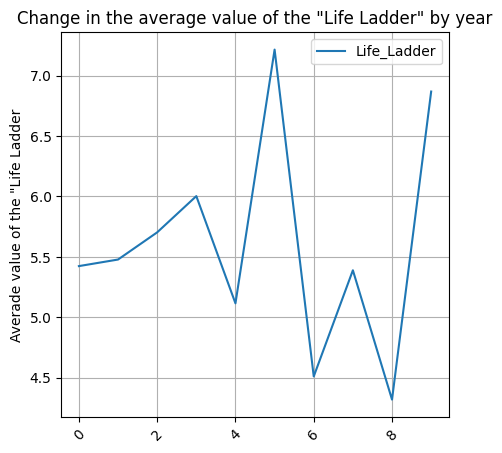

In [ ]:
group_df_year=new_df_region.groupby('year')['Life_Ladder'].mean()

group_df.plot(kind ='line',  figsize=(5,5))

plt.title('Change in the average value of the "Life Ladder" by year')
plt.xticks(rotation=45)
plt.ylabel('Averade value of the "Life Ladder')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# How much has the "Life Ladder" increased from 2006 to 2022?
# 7.73

mean_2006=new_df_region[new_df_region['year']==2006]['Life_Ladder'].mean()
mean_2022=new_df_region[new_df_region['year']==2022]['Life_Ladder'].mean()
difference = ((mean_2022-mean_2006) / mean_2006) *100
print(difference.round(2))

7.73


In [ ]:
new_df_region.groupby(['region'], as_index=False).head()


,country,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.72,7.35,0.45,50.50,0.72,0.17,0.88,0.41,0.26,South Asia
1,Afghanistan,2009,4.40,7.51,0.55,50.80,0.68,0.19,0.85,0.48,0.24,South Asia
2,Afghanistan,2010,4.76,7.61,0.54,51.10,0.60,0.12,0.71,0.52,0.28,South Asia
3,Afghanistan,2011,3.83,7.58,0.52,51.40,0.50,0.16,0.73,0.48,0.27,South Asia
4,Afghanistan,2012,3.78,7.66,0.52,51.70,0.53,0.24,0.78,0.61,0.27,South Asia
13,Albania,2007,4.63,9.12,0.82,66.76,0.53,-0.01,0.87,0.49,0.25,Central and Eastern Europe
14,Albania,2009,5.49,9.24,0.83,67.32,0.53,-0.16,0.86,0.56,0.28,Central and Eastern Europe
15,Albania,2010,5.27,9.28,0.73,67.60,0.57,-0.17,0.73,0.58,0.30,Central and Eastern Europe
16,Albania,2011,5.87,9.31,0.76,67.88,0.49,-0.21,0.88,0.57,0.26,Central and Eastern Europe
17,Albania,2012,5.51,9.33,0.78,68.16,0.60,-0.17,0.85,0.55,0.27,Central and Eastern Europe


In [ ]:
new_df_region.corr()

<ipython-input-58-3649da019529>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df_region.corr()


,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,Negative affect
year,1.000000,0.070841,0.091549,-0.011563,0.184075,0.263325,0.014527,-0.101019,0.030643,0.218919
Life_Ladder,0.070841,1.000000,0.787852,0.722660,0.724725,0.529359,0.168783,-0.450131,0.509531,-0.336414
Log_GDP_per_capita,0.091549,0.787852,1.000000,0.696002,0.831145,0.353728,-0.023932,-0.349162,0.229360,-0.258224
Social_support,-0.011563,0.722660,0.696002,1.000000,0.601685,0.402114,0.058387,-0.224150,0.435095,-0.450541
Healthy_life_expectancy_at_birth,0.184075,0.724725,0.831145,0.601685,1.000000,0.365161,0.007645,-0.303942,0.218871,-0.137130
Freedom_to_make_life_choices,0.263325,0.529359,0.353728,0.402114,0.365161,1.000000,0.319296,-0.479852,0.587429,-0.269873
Generosity,0.014527,0.168783,-0.023932,0.058387,0.007645,0.319296,1.000000,-0.281307,0.319343,-0.080766
Perceptions_of_corruption,-0.101019,-0.450131,-0.349162,-0.224150,-0.303942,-0.479852,-0.281307,1.000000,-0.292162,0.276016
Positive affect,0.030643,0.509531,0.229360,0.435095,0.218871,0.587429,0.319343,-0.292162,1.000000,-0.325957
Negative affect,0.218919,-0.336414,-0.258224,-0.450541,-0.137130,-0.269873,-0.080766,0.276016,-0.325957,1.000000


<ipython-input-60-2f22f4c7c033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=new_df_region.corr()


<Axes: >

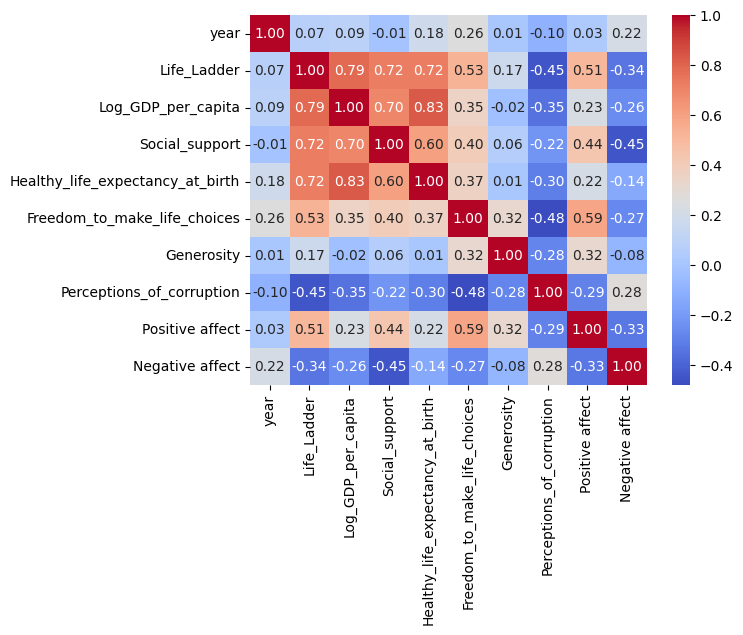

In [ ]:
correlation_matrix=new_df_region.corr()
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f")

<ipython-input-61-851ed4edd9bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_new=new_df_region.groupby('year').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

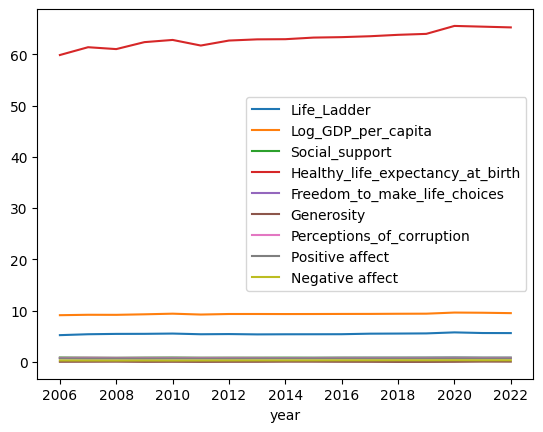

In [ ]:
plt.figure(figsize=(6,6))
means_new=new_df_region.groupby('year').mean()
means_new.plot(kind='line')
plt.show

<ipython-input-62-851ed4edd9bc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_new=new_df_region.groupby('year').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

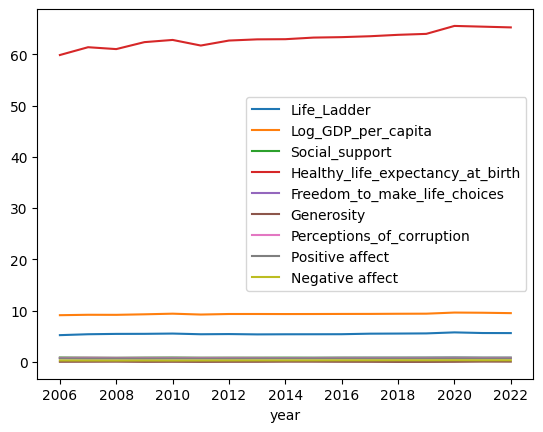

In [ ]:
plt.figure(figsize=(6,6))
means_new=new_df_region.groupby('year').mean()
means_new.plot(kind='line')
plt.show

In [ ]:
#plt.plot(new_df_region['Life_Ladder'], new_df_region['Social_support'])
#plt.title('Correlation graph between Life_Ladder and Social_support over time')
##plt.xlabel('Life_Ladder')
#plt.ylabel('Social_support')
#plt.grid(True)
#plt.show()

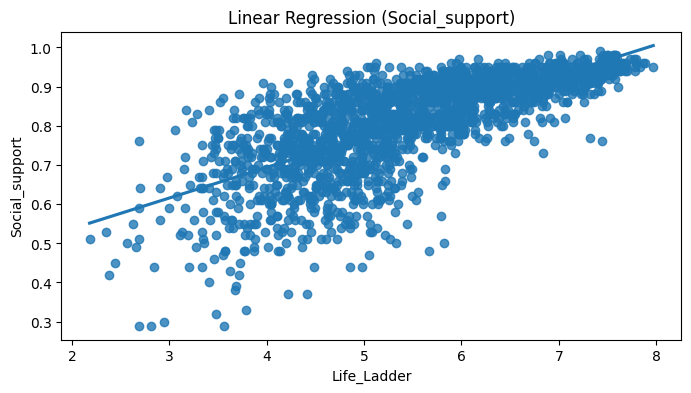

In [ ]:
plt.figure(figsize=(8, 4))
sns.regplot(x='Life_Ladder', y='Social_support', data=new_df_region, ci=None)
plt.title("Linear Regression (Social_support)")
plt.xlabel("Life_Ladder")
plt.ylabel("Social_support")
plt.show()

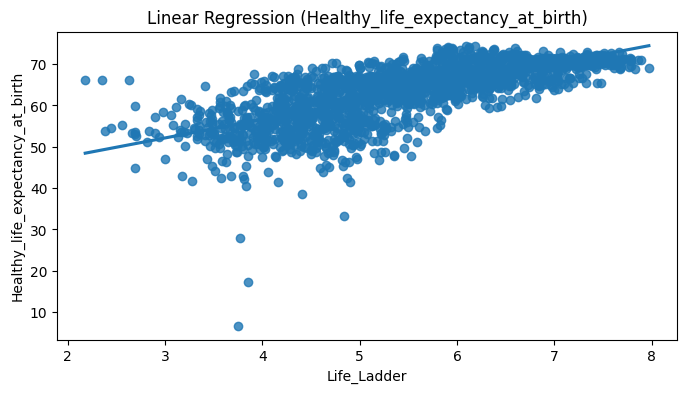

In [ ]:
plt.figure(figsize=(8, 4))
sns.regplot(x='Life_Ladder', y='Healthy_life_expectancy_at_birth', data=new_df_region, ci=None)
plt.title("Linear Regression (Healthy_life_expectancy_at_birth)")
plt.xlabel("Life_Ladder")
plt.ylabel("Healthy_life_expectancy_at_birth")
plt.show()

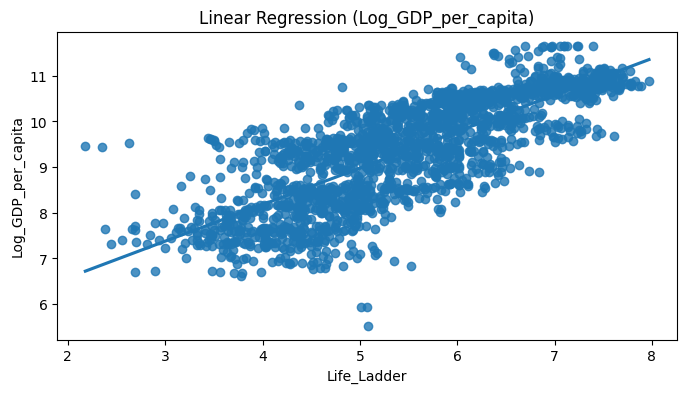

In [ ]:
plt.figure(figsize=(8, 4))
sns.regplot(x='Life_Ladder', y='Log_GDP_per_capita', data=new_df_region, ci=None)
plt.title("Linear Regression (Log_GDP_per_capita)")
plt.xlabel("Life_Ladder")
plt.ylabel("Log_GDP_per_capita")
plt.show()

In [ ]:
#plt.plot(new_df_region['Life_Ladder'], new_df_region['Healthy_life_expectancy_at_birth'], marker='o')
#plt.title('Correlation graph between Life_Ladder and Healthy_life_expectancy_at_birth over time')
#plt.xlabel('Life_Ladder')
#plt.ylabel('Healthy_life_expectancy_at_birth')
#plt.grid(True)
#plt.show()

In [ ]:
top10_country_healthy=new_df_region.nlargest(10,'Healthy_life_expectancy_at_birth')
top10_country_healthy.head(11)

,country,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive affect,region
900,Japan,2022,6.18,10.64,0.90,74.47,0.79,-0.24,0.64,0.67,East Asia
899,Japan,2021,6.09,10.62,0.90,74.35,0.80,-0.21,0.67,0.67,East Asia
898,Japan,2020,6.12,10.60,0.89,74.22,0.81,-0.26,0.61,0.68,East Asia
897,Japan,2019,5.91,10.64,0.88,74.10,0.81,-0.26,0.62,0.69,East Asia
896,Japan,2018,5.79,10.64,0.89,73.97,0.77,-0.27,0.69,0.65,East Asia
1626,South Korea,2022,5.95,10.73,0.81,73.93,0.72,0.00,0.75,0.58,East Asia
895,Japan,2017,5.91,10.63,0.88,73.85,0.85,-0.21,0.66,0.69,East Asia
1564,Singapore,2021,6.59,11.57,0.88,73.80,0.88,0.06,0.14,0.70,Southeast Asia
894,Japan,2016,5.95,10.61,0.90,73.72,0.84,-0.07,0.70,0.69,East Asia
1625,South Korea,2021,6.11,10.70,0.81,73.65,0.72,-0.03,0.69,0.57,East Asia


In [ ]:
top10_country_healthy=new_df_region.nlargest(10,'Healthy_life_expectancy_at_birth')
top10_country_healthy[['country',	'year',	'Healthy_life_expectancy_at_birth', 'Life_Ladder', 'Log_GDP_per_capita','Social_support']].head(11)

,country,year,Healthy_life_expectancy_at_birth,Life_Ladder,Log_GDP_per_capita,Social_support
900,Japan,2022,74.47,6.18,10.64,0.90
899,Japan,2021,74.35,6.09,10.62,0.90
898,Japan,2020,74.22,6.12,10.60,0.89
897,Japan,2019,74.10,5.91,10.64,0.88
896,Japan,2018,73.97,5.79,10.64,0.89
1626,South Korea,2022,73.93,5.95,10.73,0.81
895,Japan,2017,73.85,5.91,10.63,0.88
1564,Singapore,2021,73.80,6.59,11.57,0.88
894,Japan,2016,73.72,5.95,10.61,0.90
1625,South Korea,2021,73.65,6.11,10.70,0.81


In [ ]:
top10_country_social=new_df_region.nlargest(10,'Social_support')
top10_country_social[['country',	'year',	'Social_support','Life_Ladder', 'Log_GDP_per_capita', 'Healthy_life_expectancy_at_birth']].head(11)

,country,year,Social_support,Life_Ladder,Log_GDP_per_capita,Healthy_life_expectancy_at_birth
1271,New Zealand,2015,0.99,7.42,10.62,69.90
751,Iceland,2008,0.98,6.89,10.88,71.20
752,Iceland,2012,0.98,7.59,10.79,71.60
754,Iceland,2015,0.98,7.50,10.86,71.90
755,Iceland,2016,0.98,7.51,10.91,71.93
757,Iceland,2020,0.98,7.58,10.86,72.03
758,Iceland,2021,0.98,7.56,10.89,72.05
759,Iceland,2022,0.98,7.45,10.94,72.07
819,Ireland,2008,0.98,7.57,10.94,69.86
822,Ireland,2011,0.98,7.01,10.89,70.22


In [ ]:
top10_country_life=new_df_region.nlargest(10,'Life_Ladder')
top10_country_life[['country',	'year',	'Life_Ladder', 'Log_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy_at_birth']].head(11)

,country,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth
464,Denmark,2008,7.97,10.88,0.95,68.96
582,Finland,2020,7.89,10.77,0.96,71.07
580,Finland,2018,7.86,10.78,0.96,70.93
463,Denmark,2007,7.83,10.89,0.95,68.74
467,Denmark,2011,7.79,10.85,0.96,69.62
579,Finland,2017,7.79,10.77,0.96,70.85
583,Finland,2021,7.79,10.79,0.97,71.15
581,Finland,2019,7.78,10.79,0.94,71.00
1686,Switzerland,2012,7.78,11.11,0.95,71.52
466,Denmark,2010,7.77,10.84,0.97,69.40


In [ ]:
top10_country_GDP=new_df_region.nlargest(10,'Log_GDP_per_capita')
top10_country_GDP[['country',	'year',	'Log_GDP_per_capita', 'Life_Ladder', 'Social_support', 'Healthy_life_expectancy_at_birth']].head(10)


,country,year,Log_GDP_per_capita,Life_Ladder,Social_support,Healthy_life_expectancy_at_birth
1041,Luxembourg,2016,11.66,6.97,0.94,71.53
1045,Luxembourg,2022,11.66,7.23,0.88,71.68
1035,Luxembourg,2010,11.65,7.10,0.95,70.50
1042,Luxembourg,2017,11.65,7.06,0.91,71.55
1043,Luxembourg,2018,11.65,7.24,0.90,71.57
1044,Luxembourg,2019,11.65,7.40,0.91,71.60
1036,Luxembourg,2011,11.64,7.10,0.93,70.70
1038,Luxembourg,2013,11.64,7.13,0.92,71.10
1039,Luxembourg,2014,11.64,6.89,0.88,71.30
1040,Luxembourg,2015,11.64,6.70,0.93,71.50


In [ ]:
plt.figure(figsize=(6,6))
means_new.plot(kind='barh', x='Social support', y='Life Ladder')
plt.xlabel('Social support')
plt.ylabel('Life Ladder')
plt.show

<ipython-input-72-345656a3ed25>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(new_df_region.Life_Ladder)


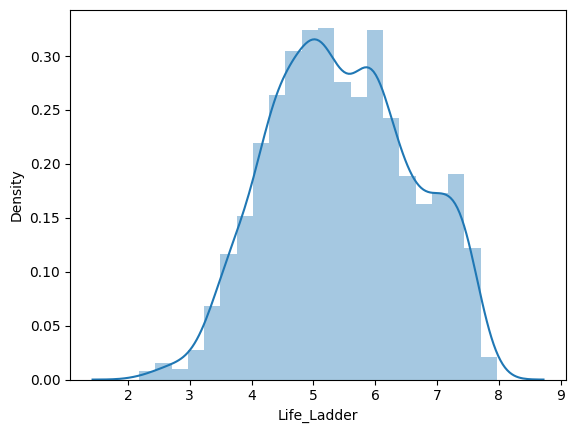

In [ ]:
ax = sns.distplot(new_df_region.Life_Ladder)

In [ ]:
#group_df_region=new_df_region.groupby('region')['Life_Ladder'].mean()

group_df_region.plot(kind ='area',  figsize=(10,5))

plt.title('Variation by region')
plt.xlabel('region')
plt.xticks(rotation=45)
plt.ylabel('Averade value')
plt.legend()
plt.grid()
plt.legend()
plt.grid(True)
plt.show()

NameError: ignored

<function matplotlib.pyplot.show(close=None, block=None)>

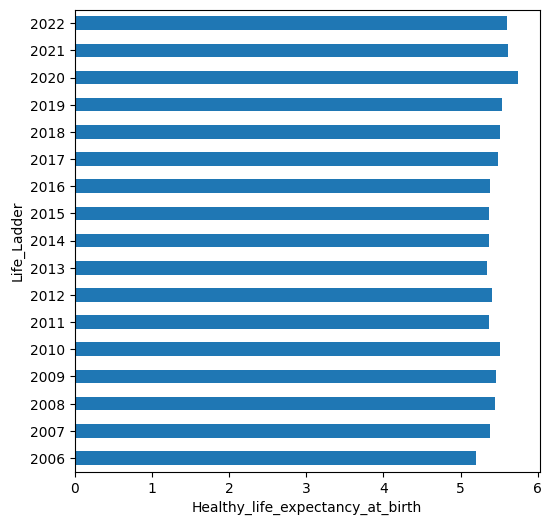

In [ ]:
plt.figure(figsize=(6,6))
group_df.plot(kind='barh', x='Healthy_life_expectancy_at_birth', y='Life_Ladder')
plt.xlabel('Healthy_life_expectancy_at_birth')
plt.ylabel('Life_Ladder')
plt.show

In [ ]:
plt.new_df_region.groupby('region')['Life_Ladder'].mean()

AttributeError: ignored